## Student details

- Name: Tanaka Mambinge
- Reg number: R223585Q
- Programme: HDS

## Importing libraries

In [1]:
# This code imports necessary libraries for data analysis, visualization,
# and statistical modeling, such as math, random, matplotlib, numpy, pandas, seaborn, and scipy.
import math
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

## Load data

In [2]:
# create a list of the data from the file
def str_to_int(a):
    if isinstance(a, str):
        a = a.strip()
    return int(a) if a.isdigit() else 0


with open("data/adult.data", "r") as file:
    temp_data = file.read()
    temp_data = temp_data.split("\n")
    temp_data = [r.split(",") for r in temp_data]
    cols_to_convert = [0, 2, 4, 10, 11, 12]
    data = []

    for r in temp_data:
        if len(r) == 15:
            data.append(
                [
                    str_to_int(item) if idx in cols_to_convert else str(item).strip()
                    for idx, item in enumerate(r)
                ]
            )

In [3]:
print(data[1:2])

[[50, 'Self-emp-not-inc', 83311, 'Bachelors', 13, 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 0, 0, 13, 'United-States', '<=50K']]


In [4]:
# creating df
cols = [
    "age",
    "type_employer",
    "fnlwgt",
    "education",
    "education_num",
    "marital",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital_gain",
    "capital_loss",
    "hr_per_week",
    "country",
    "income",
]
df = pd.DataFrame(data, columns=cols)

In [5]:
# the shape attr returns a tuple containing n_rows and n_cols
df.shape

(32561, 15)

In [6]:
# This code groups the data in a DataFrame by country and
# counts the number of occurrences for each country,
# then displays the first few rows of the resulting Series.
counts = df.groupby("country").size()
print(counts.head())

country
?           583
Cambodia     19
Canada      121
China        75
Columbia     59
dtype: int64


In [7]:
df.sex == "Male"

0         True
1         True
2         True
3         True
4        False
         ...  
32556    False
32557     True
32558    False
32559     True
32560    False
Name: sex, Length: 32561, dtype: bool

In [8]:
# Filter the df dataframe to create a new dataframe containing
# only the rows where the sex column equals "Male",
# and then display the first five rows of the resulting dataframe.
males_mask = df.sex == "Male"
males = df[males_mask]
males.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K


In [9]:
# Filtering rows where sex is Male and income is >50K
h_income_mask = df.income == ">50K"
h_income_males = df[males_mask & h_income_mask]
h_income_males.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K


In [10]:
# Selecting only the rows in the DataFrame where sex is "Female"
females_mask = df.sex == "Female"
females = df[females_mask]
females.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K


In [11]:
# This code filters the DataFrame to include only
# females and those with an income greater than 50K
h_income_females = df[females_mask & h_income_mask]
females.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K


## Exploratory Data Analysis

In [12]:
# Displaying the percentage of high income earners in the population,
# and the percentage of high income earners among males and females separately.
h_income_earners = df[h_income_mask]
print(
    f"{int(len(h_income_earners) / len(df) * 100)}% of the population are high income earners."
)
print(
    f"{int(len(h_income_males) / len(males) * 100)}% of males are high income earners."
)
print(
    f"{int(len(h_income_females) / len(females) * 100)}% of females are high income earners."
)

24% of the population are high income earners.
30% of males are high income earners.
10% of females are high income earners.


## Mean

In [13]:
# Displaying the average age of males, females, high income males, and high income females.
print(f"Average male age is - {males.age.mean()}")
print(f"Average female age is - {females.age.mean()}")
print(f"Average high income male age is - {h_income_males.age.mean()}")
print(f"Average high income female age is - {h_income_females.age.mean()}")

Average male age is - 39.43354749885268
Average female age is - 36.85823043357163
Average high income male age is - 44.62578805163614
Average high income female age is - 42.125530110262936


## Sample Variance

In [14]:
# Compute the mean, variance and standard deviation of
# the hours worked per week for males and females
male_mu, male_var, male_std = (
    males.hr_per_week.mean(),
    males.hr_per_week.var(),
    males.hr_per_week.std(),
)
female_mu, female_var, female_std = (
    females.hr_per_week.mean(),
    females.hr_per_week.var(),
    females.hr_per_week.std(),
)

# Display the statistics of hours worked per week for men and women
print(
    "Statistics of hours worked per week for men:\n",
    f"mu: {male_mu}\n",
    f"var: {male_var}\n",
    f"std: {male_std}\n",
)
print(
    "Statistics of hours worked per week for women:\n",
    f"mu: {female_mu}\n",
    f"var: {female_var}\n",
    f"std: {female_std}\n",
)

Statistics of hours worked per week for men:
 mu: 42.42808627810923
 var: 146.88846717140746
 std: 12.11975524387384

Statistics of hours worked per week for women:
 mu: 36.410361154953115
 var: 139.50679700047422
 std: 11.811299547487323



## Sample Median

In [15]:
# The code calculates the median age for males and females,
# and separately for high-income males and females.
# The median age values are printed for each case.
ml_median = males.age.median()
fm_median = females.age.median()
print("Median age per men and women is", ml_median, "and", fm_median)

ml_median_age = h_income_males.age.median()
fm_median_age = h_income_females.age.median()
print(
    "Median age per men and women with high-income is",
    ml_median_age,
    "and",
    fm_median_age,
)

Median age per men and women is 38.0 and 35.0
Median age per men and women with high-income is 44.0 and 41.0


## Data distributions

<AxesSubplot:>

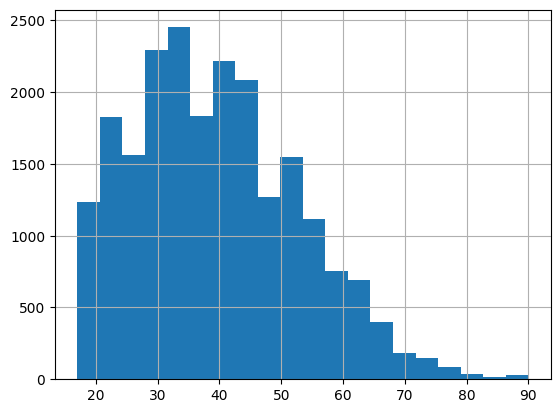

In [16]:
# This code generates a histogram of the "age" variable for male individuals in the dataset, with 20 bins
males.age.hist(density=0, histtype="stepfilled", bins=20)

<AxesSubplot:>

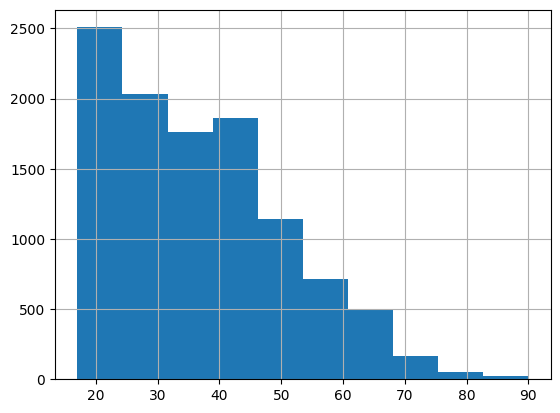

In [17]:
# Plots a histogram of the age variable for females
# The hist is also positively skewed
females.age.hist(density=0, histtype="stepfilled", bins=10)

<AxesSubplot:>

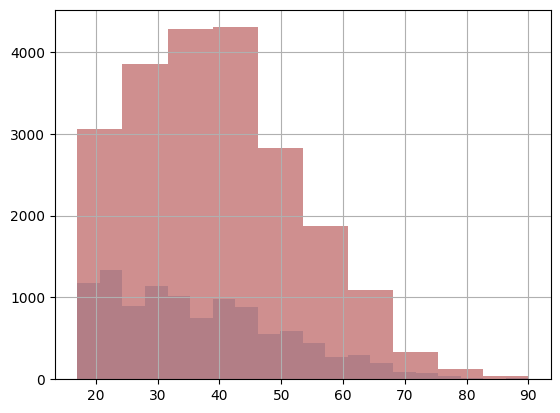

In [18]:
# Comparing histograms of age for males and females.
females.age.hist(density=0, histtype="stepfilled", alpha=0.5, bins=20)
males.age.hist(
    density=0,
    histtype="stepfilled",
    alpha=0.75,
    color=sns.desaturate("indianred", 0.75),
    bins=10,
)

<AxesSubplot:>

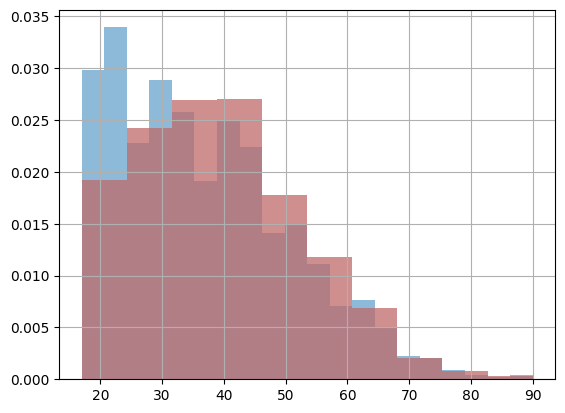

In [19]:
# Plotting histograms for male and female ages with density information.
females.age.hist(density=1, histtype="stepfilled", alpha=0.5, bins=20)
males.age.hist(
    density=1,
    histtype="stepfilled",
    alpha=0.75,
    color=sns.desaturate("indianred", 0.75),
    bins=10,
)

<AxesSubplot:>

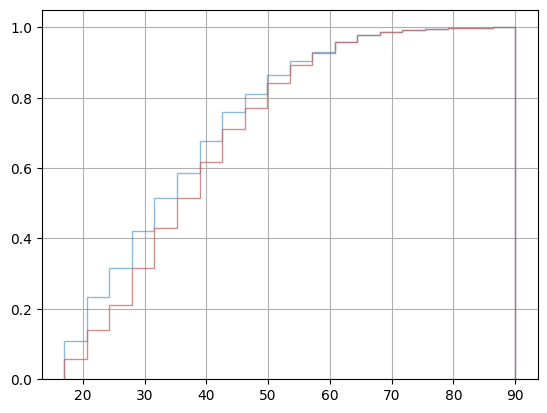

In [20]:
# Plot cumulative histograms of age distribution for females and males.
females.age.hist(density=1, histtype="step", cumulative=True, alpha=0.5, bins=20)
males.age.hist(
    density=1,
    histtype="step",
    cumulative=True,
    alpha=0.75,
    color=sns.desaturate("indianred", 0.75),
    bins=20,
)

## Outlier treatment

In [21]:
# Code drops outliers from the dataset based on their age and income.
age_upper_bound = df.age < df.age.median() + 35
age_lower_bound = df.age > df.age.median() - 15

df2 = df.drop(df[~(h_income_mask & age_lower_bound & age_upper_bound)].index)

In [22]:
# This code drops high-income male and female records
# that have age greater than the median age plus 35
# or less than the median age minus 15
h_income_males_2 = h_income_males.drop(
    h_income_males[
        (
            (h_income_males.age > df.age.median() + 35)
            & (h_income_males.age > df.age.median() - 15)
        )
    ].index
)

h_income_females_2 = h_income_females.drop(
    h_income_females[
        (
            (h_income_females.age > df.age.median() + 35)
            & (h_income_females.age > df.age.median() - 15)
        )
    ].index
)

In [23]:
# This code calculates and prints the mean, median, standard deviation,
# minimum, and maximum age for high-income males and females
# after removing outliers based on age.
male_mu, male_median, male_std = (
    h_income_males_2.age.mean(),
    h_income_males_2.age.median(),
    h_income_males_2.age.std(),
)
female_mu, female_median, female_std = (
    h_income_females_2.age.mean(),
    h_income_females_2.age.median(),
    h_income_females_2.age.std(),
)

print(
    "Statistics of age for men:\n",
    f"mu: {male_mu}\n",
    f"std: {male_std}\n",
    f"median: {male_median}\n",
    f"min: {h_income_males_2.age.min()}\n",
    f"max: {h_income_males_2.age.max()}\n",
)
print(
    "Statistics of age for women:\n",
    f"mu: {female_mu}\n",
    f"std: {female_std}\n",
    f"median: {female_median}\n",
    f"min: {h_income_females_2.age.min()}\n",
    f"max: {h_income_females_2.age.max()}\n",
)

Statistics of age for men:
 mu: 44.317982123920615
 std: 10.019749857171409
 median: 44.0
 min: 19
 max: 72

Statistics of age for women:
 mu: 41.877028181041844
 std: 10.036441807343707
 median: 41.0
 min: 19
 max: 72



<AxesSubplot:>

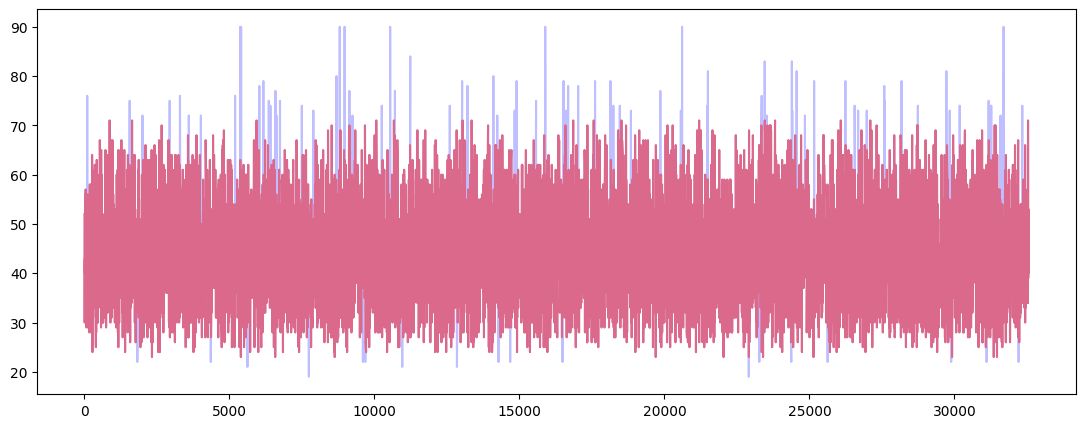

In [24]:
# Create a plot comparing the age distribution of individuals with
# income greater than 50K before and after outlier treatment.
# The blue plot represents the age distribution before outlier
# treatment, while the red plot represents the age distribution
# after outlier treatment.
plt.figure(figsize=(13.4, 5))
df.age[(df.income == ">50K")].plot(alpha=0.25, color="blue")
df2.age[(df2.income == ">50K")].plot(alpha=0.45, color="red")

In [25]:
# Comparing mean age difference between males and females with and without outliers.
print(
    f"The mean difference with outliers is: {(males.age.mean() - females.age.mean()):.2f}"
)
print(
    f"The mean difference with outliers is: {(h_income_males_2.age.mean() - h_income_females_2.age.mean()):.2f}"
)

The mean difference with outliers is: 2.58
The mean difference with outliers is: 2.44


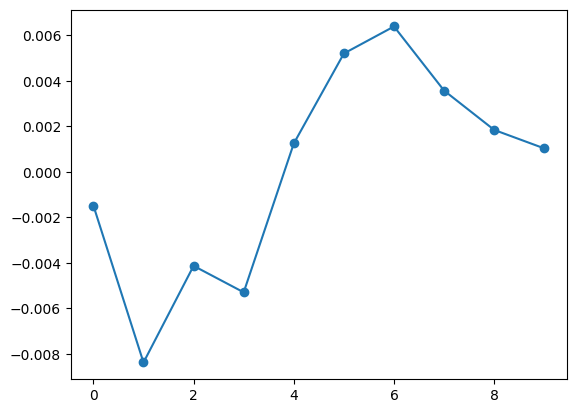

In [26]:
# Plot the difference in normalized histograms between males and females for the age distribution.
countx, divisionx = np.histogram(h_income_males_2.age, density=True)
county, divisiony = np.histogram(h_income_females_2.age, density=True)

val = [(divisionx[i], divisionx[i + 1] / 2) for i in range(len(divisionx) - 1)]
plt.plot(countx - county, "o-")

## Measuring Asymmetry: Skewness and Pearson’s Median Skewness Coefficient

In [27]:
# Calculate and print the skewness of the male and female
# populations using the skewness function, which takes a
# sample and returns the sample's skewness value
def skewness(x):
    res = 0
    m = x.mean()
    s = x.std()

    for i in x:
        res += (i - m) * (i - m) * (i - m)
    res /= len(x) * s * s * s
    return res


print(f"Skewness of male population = {skewness(h_income_males_2.age)}")
print(f"Skewness of male population = {skewness(h_income_females_2.age)}")

Skewness of male population = 0.26644438384328223
Skewness of male population = 0.3863335249128606


In [28]:
# Print Pearson's coefficient for male and female population.
def pearson(x):
    return 3 * (x.mean() - x.median()) * x.std()


print(f"Pearson's coefficient of male population = {pearson(h_income_males_2.age)}")
print(f"Pearson's coefficient of male population = {pearson(h_income_females_2.age)}")

Pearson's coefficient of male population = 9.558304022209926
Pearson's coefficient of male population = 26.406726907280902


## Kernel density

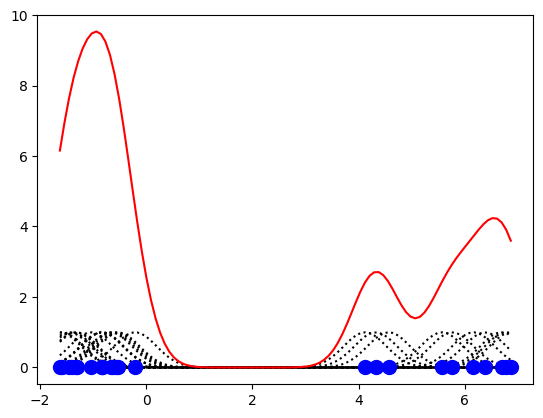

In [29]:
# Plotting kernel density estimation for a bimodal distribution using normal distribution
x1 = np.random.normal(-1, 0.5, 15)
x2 = np.random.normal(6, 1, 10)
y = np.r_[x1, x2]
x = np.linspace(min(y), max(y), 100)
s = 0.4
kernels = np.transpose([stats.norm.pdf(x, yi, s) for yi in y])
plt.plot(x, kernels, "k:")
plt.plot(x, kernels.sum(1), "r")
plt.plot(y, np.zeros(len(y)), "bo", ms=10)

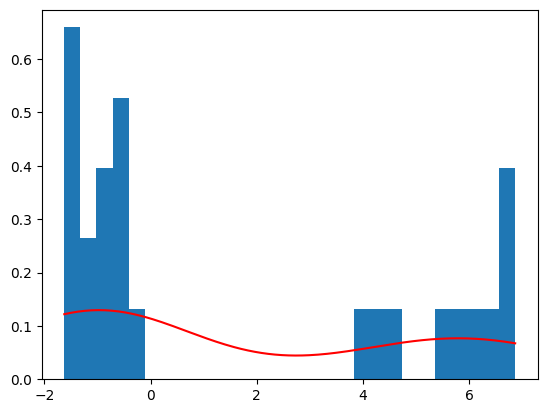

In [30]:
# This code generates a kernel density estimate plot
# with a Gaussian kernel for the data 'y'. It also
# displays a histogram of the data with 28 bins.
density = stats.gaussian_kde(y)
xgrid = np.linspace(x.min(), x.max(), 200)
plt.hist(y, bins=28, density=True)
plt.plot(xgrid, density(xgrid), "r-")

## Estimation

In [31]:
# This code calculates the average mean squared error
# (MSE) of 200 sets of normally distributed random numbers.
NTs = 200
mu = 0.0
var = 1.0
err = 0.0
NPs = 1000
for i in range(NTs):
    x = np.random.normal(mu, var, NPs)
    err += (x.mean() - mu) ** 2
print(" MSE : ", err / NTs)

 MSE :  0.0009170949539700711


## Sampling Distribution of Point Estimates

In [32]:
# Loading data
data = pd.read_csv("data/ACCIDENTS_GU_BCN_2013.csv", encoding="ISO-8859-1")

In [33]:
# Creating and formating data column
data["Date"] = data["Mes de any"].astype(str) + "-" + data["Dia de mes"].astype(str)
data["Date"] = pd.to_datetime(data["Date"], format="%m-%d")
data["Date"] = data["Date"].dt.strftime("%m-%d")

In [34]:
# This code calculates and prints the mean value of the
# number of occurrences for each unique date in a pandas DataFrame.
accidents = data.groupby(["Date"]).size()
print("Mean:", round(accidents.mean(), 4))

Mean: 25.9096


In [35]:
# This code generates a sample of 10000 sets
# of 200 randomly selected elements from a pandas
# DataFrame, calculates the mean value of each set
df = accidents.to_frame()
N_test = 10000
elements = 200
means = [0] * N_test

for i in range(N_test):
    rows = np.random.choice(df.index.values, elements)
    sampled_df = df.loc[rows]
    means[i] = sampled_df.mean()

In [36]:
# The code performs direct and simulated estimation
# of standard error from a sample of 200 elements.
rows = np.random.choice(df.index.values, 200)
sampled_df = df.loc[rows]
est_sigma_mean = sampled_df.std() / math.sqrt(200)
print("Direct estimation of SE from one sample of 200 elements:", est_sigma_mean[0])
print(
    "Estimation of the SE by simulating 10000 samples of 200 elements:",
    np.array(means).std(),
)

Direct estimation of SE from one sample of 200 elements: 0.6183133769867865
Estimation of the SE by simulating 10000 samples of 200 elements: 0.6415369618650199


In [37]:
# The code uses bootstrap resampling to estimate the mean of a given dataset,
# by generating 10000 samples with replacement, calculating the mean of each sample,
# and returning a list of these means. The final output is the mean of the list of means,
# representing the estimated mean of the original dataset.
def meanBootstrap(X, numberb):
    x = [0] * numberb
    for i in range(numberb):
        sample = [X[j] for j in np.random.randint(len(X), size=len(X))]
        x[i] = np.mean(sample)
    return x


m = meanBootstrap(accidents, 10000)
print("Mean estimate :", np.mean(m))

Mean estimate : 25.904116438356166


## Confidence Intervals

In [38]:
# This code calculates the confidence interval of the mean of a dataset "accidents"
m = accidents.mean()
se = accidents.std() / math.sqrt(len(accidents))
ci = [m - se * 1.96, m + se * 1.96]
print("Confidence interval:", ci)

Confidence interval: [24.975156065800284, 26.8440220163915]


In [39]:
# This code uses bootstrap resampling to estimate the mean of
# a dataset "accidents" and calculates the sample mean, standard error
# of the means, and 95% confidence interval using percentiles of the bootstrap sample means.
m = meanBootstrap(accidents, 10000)
sample_mean = np.mean(m)
sample_se = np.std(m)
print("Mean estimate:", sample_mean)
print("SE of the estimate:", sample_se)
ci = [np.percentile(m, 2.5), np.percentile(m, 97.5)]
print("Confidence interval:", ci)

Mean estimate: 25.910817260273973
SE of the estimate: 0.47268683569525677
Confidence interval: [24.98623287671233, 26.83568493150685]


## Testing Hypotheses Using Confidence Intervals

In [40]:
# This code reads in two CSV files of traffic accidents
# in Barcelona from 2010 and 2013, creates a "Date" column
# by combining the day and month columns, counts the number
# of accidents per date, and calculates the mean number of
# accidents per date for each year.
data = pd.read_csv("data/ACCIDENTS_GU_BCN_2010.csv", encoding="latin -1")

# Create a new column which is the date
data["Date"] = (
    data["Dia de mes"].apply(lambda x: str(x))
    + "-"
    + data["Mes de any"].apply(lambda x: str(x))
)
data2 = data["Date"]
counts2010 = data["Date"].value_counts()
print("2010: Mean", counts2010.mean())

data = pd.read_csv("data/ACCIDENTS_GU_BCN_2013.csv", encoding="ISO-8859-1")

# Create a new column which is the date
data["Date"] = (
    data["Dia de mes"].apply(lambda x: str(x))
    + "-"
    + data["Mes de any"].apply(lambda x: str(x))
)
data2 = data["Date"]
counts2013 = data["Date"].value_counts()
print("2013: Mean", counts2013.mean())

2010: Mean 24.81095890410959
2013: Mean 25.90958904109589


In [41]:
# This code calculates the confidence interval of the mean number of accidents per date in the year 2013
n = len(counts2013)
mean = counts2013.mean()
s = counts2013.std()
ci = [mean - s * 1.96 / np.sqrt(n), mean + s * 1.96 / np.sqrt(n)]
print("2010 accident rate estimate:", counts2010.mean())
print("2013 accident rate estimate:", counts2013.mean())
print("CI for 2013: ", ci)

2010 accident rate estimate: 24.81095890410959
2013 accident rate estimate: 25.90958904109589
CI for 2013:  [24.975156065800284, 26.8440220163915]


## Testing Hypotheses Using p-Values

In [42]:
# This code calculates the difference between the mean number of accidents per date in the years 2010 and 2013
m = len(counts2010)
n = len(counts2013)
p = counts2013.mean() - counts2010.mean()
print("m:", m, "n:", n)
print("meandifference:", p)

m: 365 n: 365
meandifference: 1.0986301369863014


In [43]:
# This code generates 10,000 random samples of size n
# from a shuffled array containing the number of traffic
# accidents per date in the years 2010 and 2013. For each
# pair of samples, the difference in means is calculated
# and stored in the "diff" array.
x = counts2010
y = counts2013
pool = np.concatenate([x, y])
np.random.shuffle(pool)

# sample generation
N = 10000  # number of samples
diff = np.zeros(N)
for i in range(N):
    p1 = [random.choice(pool) for _ in range(n)]
    p2 = [random.choice(pool) for _ in range(n)]
    diff[i] = np.mean(p1) - np.mean(p2)

In [44]:
# This code computes the p-value by counting the number
# of simulations where the difference in means is greater
# than the observed difference. It then prints the p-value
# and whether the effect is likely or not based on a threshold
diff2 = np.array(diff)
w1 = np.where(diff2 > p)[0]

print(
    "p-value (Simulation) =",
    len(w1) / float(N),
    f"{len(w1) /float(N) * 100}%",
    "Difference =",
    p,
)

if (len(w1) / float(N)) < 0.05:
    print("The effect is likely")
else:
    print("The effect is not likely")

p-value (Simulation) = 0.0457 4.569999999999999% Difference = 1.0986301369863014
The effect is likely
